# Random residual split

Hi!<br>
see results below on adversery experiment with random split:<br>
comparing:
```
test_residual_split/derived1/train.log -> spliting conv1_1 based on TPM scores 
(32 kernels are splitted 13 in "fast" parittion  and 19 in "slow" partition with residual addition)
(RED curve)

### compared to 

test_residual_random_split/derived1/train.log -> spliting conv1_1 randomlly
(32 kernels are splitted 16 in "fast" partition , i.e. as is , 16 in "slow" partition i.e. with residual addition (GREEN)curve

```


The blue curve is the baseline.<br>
- NOTE: the residual TPM based split and the random split have been trained with the same hyper params

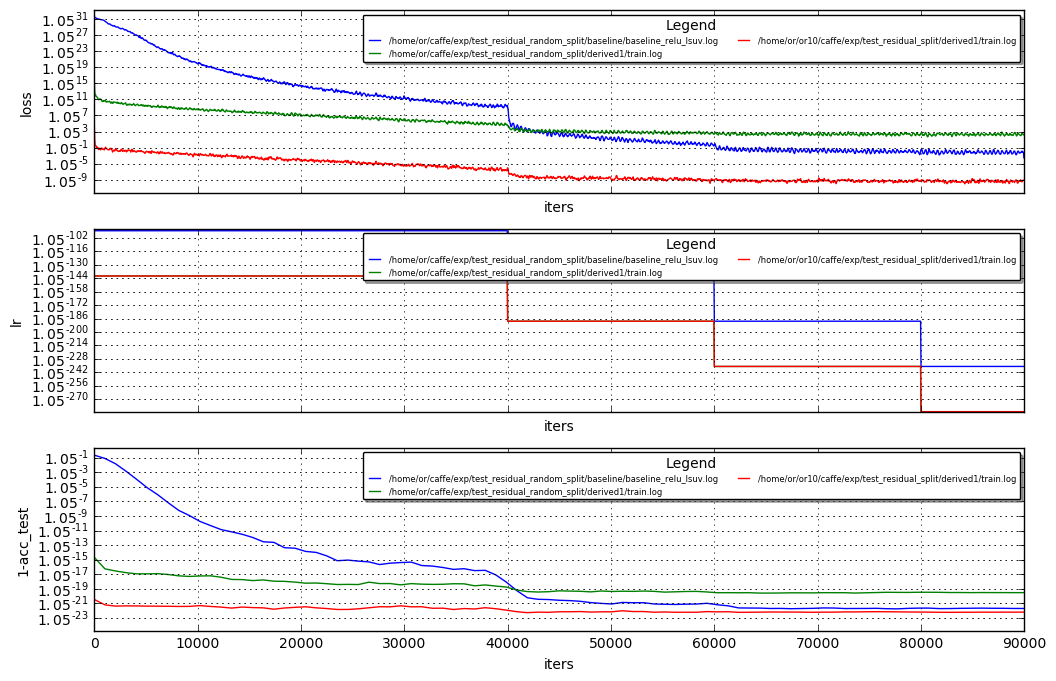

In [5]:
%run ~/caffe/utils/plot_loss.py  /home/or/caffe/exp/test_residual_random_split/baseline/baseline_relu_lsuv.log   /home/or/caffe/exp/test_residual_random_split/derived1/train.log ~/or10/caffe/exp/test_residual_split/derived1/train.log  --avg 3

In this experiment, running the random split underperformed the baseline.<br>
while the TPM based split outperformed the baseline

Net | ACC
----| ---
baseline | 0.653201
rand_split | 0.613901
TPM_split  | 0.6617

In [7]:
! cat /home/or/caffe/exp/test_residual_random_split/baseline/baseline_relu_lsuv.log | grep -B 3 "Optimi.*Done"

I0213 23:00:46.169908 26554 solver.cpp:340] Iteration 90000, Testing net (#0)
I0213 23:02:27.650948 26554 solver.cpp:408]     Test net output #0: accuracy = 0.653201
I0213 23:02:27.651077 26554 solver.cpp:408]     Test net output #1: loss = 1.3247 (* 1 = 1.3247 loss)
I0213 23:02:27.651082 26554 solver.cpp:325] Optimization Done.
I0213 23:02:27.651084 26554 caffe.cpp:215] Optimization Done.


In [8]:
! cat /home/or/caffe/exp/test_residual_random_split/derived1/train.log | grep -B 3 "Optimi.*Done"

I0306 02:20:44.612457 30821 data_transformer.cpp:608] Using online data augmentation Phase=1 crop_size=0 contrast_adjustment=0 smooth_filtering=0 jpeg_compression=0 do_mirror=0 color_jitter_noise=0 rotation_angle_interval=1
I0306 02:20:47.098028 30795 solver.cpp:433]     Test net output #0: accuracy = 0.613901
I0306 02:20:47.098075 30795 solver.cpp:433]     Test net output #1: loss = 1.43467 (* 1 = 1.43467 loss)
I0306 02:20:47.098083 30795 solver.cpp:345] Optimization Done.
I0306 02:20:47.098085 30795 caffe.cpp:254] Optimization Done.


In [9]:
! cat ~/or10/caffe/exp/test_residual_split/derived1/train.log | grep -B 3 "Optimi.*Done"

I0227 19:20:33.276326 15832 data_transformer.cpp:608] Using online data augmentation Phase=1 crop_size=0 contrast_adjustment=0 smooth_filtering=0 jpeg_compression=0 do_mirror=0 color_jitter_noise=0 rotation_angle_interval=1
I0227 19:20:37.299788 15671 solver.cpp:433]     Test net output #0: accuracy = 0.6617
I0227 19:20:37.299815 15671 solver.cpp:433]     Test net output #1: loss = 1.48894 (* 1 = 1.48894 loss)
I0227 19:20:37.299819 15671 solver.cpp:345] Optimization Done.
I0227 19:20:37.336551 15671 caffe.cpp:254] Optimization Done.
